<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

from sklearn.feature_extraction import DictVectorizer

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv(
    'https://github.com/chino1504/diplodatos/blob/main/EyCD/melb_df_final.csv?raw=true')
melb_df

,Suburb,Rooms,Type,Price,Postcode,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_price_max
0,Abbotsford,2,h,1480000.0,3067.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,3067.0,247.0,111.295547,336.0
1,Abbotsford,2,h,1035000.0,3067.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,3067.0,247.0,111.295547,336.0
2,Abbotsford,3,h,1465000.0,3067.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,3067.0,247.0,111.295547,336.0
3,Abbotsford,3,h,850000.0,3067.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,3067.0,247.0,111.295547,336.0
4,Abbotsford,4,h,1600000.0,3067.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,3067.0,247.0,111.295547,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11703,Werribee,4,h,635000.0,3030.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,3030.0,246.0,99.626016,350.0
11704,Westmeadows,3,h,582000.0,3049.0,2.0,256.0,NaN,NaN,-37.67917,144.89390,3049.0,21.0,92.285714,281.0
11705,Wheelers Hill,4,h,1245000.0,3150.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,3150.0,183.0,111.863388,300.0
11706,Williamstown,3,h,1031000.0,3016.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,3016.0,70.0,168.800000,350.0


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


#Desarrollo
##1.1 Primero convertimos el conjunto de datos en una lista de diccionarios.

In [ ]:
melb_df_fea = melb_df.copy()
melb_dict = list(melb_df_fea.T.to_dict().values())
melb_dict[:1]

[{'Suburb': 'Abbotsford',
  'Rooms': 2,
  'Type': 'h',
  'Price': 1480000.0,
  'Postcode': 3067.0,
  'Car': 1.0,
  'Landsize': 202.0,
  'BuildingArea': nan,
  'YearBuilt': nan,
  'Lattitude': -37.7996,
  'Longtitude': 144.9984,
  'zipcode': 3067.0,
  'airbnb_record_count': 247.0,
  'airbnb_price_mean': 111.29554655870446,
  'airbnb_price_max': 336.0}]

In [ ]:
vec = DictVectorizer(sparse=False)
melb_matrix = vec.fit_transform(melb_dict)
melb_matrix

array([[           nan, 1.00000000e+00, 2.02000000e+02, ...,
        1.11295547e+02, 2.47000000e+02, 3.06700000e+03],
       [7.90000000e+01, 0.00000000e+00, 1.56000000e+02, ...,
        1.11295547e+02, 2.47000000e+02, 3.06700000e+03],
       [1.50000000e+02, 0.00000000e+00, 1.34000000e+02, ...,
        1.11295547e+02, 2.47000000e+02, 3.06700000e+03],
       ...,
       [           nan, 2.00000000e+00, 6.52000000e+02, ...,
        1.11863388e+02, 1.83000000e+02, 3.15000000e+03],
       [1.33000000e+02, 2.00000000e+00, 3.33000000e+02, ...,
        1.68800000e+02, 7.00000000e+01, 3.01600000e+03],
       [1.12000000e+02, 1.00000000e+00, 3.62000000e+02, ...,
        1.26750000e+02, 8.00000000e+01, 3.01300000e+03]])

In [ ]:
vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['BuildingArea',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Postcode',
 'Price',
 'Rooms',
 'Suburb=Abbotsford',
 'Suburb=Aberfeldie',
 'Suburb=Airport West',
 'Suburb=Albanvale',
 'Suburb=Albert Park',
 'Suburb=Albion',
 'Suburb=Alphington',
 'Suburb=Altona',
 'Suburb=Altona Meadows',
 'Suburb=Altona North',
 'Suburb=Ardeer',
 'Suburb=Armadale',
 'Suburb=Ascot Vale',
 'Suburb=Ashburton',
 'Suburb=Ashwood',
 'Suburb=Aspendale',
 'Suburb=Aspendale Gardens',
 'Suburb=Attwood',
 'Suburb=Avondale Heights',
 'Suburb=Balaclava',
 'Suburb=Balwyn',
 'Suburb=Balwyn North',
 'Suburb=Bayswater',
 'Suburb=Bayswater North',
 'Suburb=Beaconsfield',
 'Suburb=Beaconsfield Upper',
 'Suburb=Beaumaris',
 'Suburb=Bellfield',
 'Suburb=Bentleigh',
 'Suburb=Bentleigh East',
 'Suburb=Berwick',
 'Suburb=Black Rock',
 'Suburb=Blackburn',
 'Suburb=Blackburn North',
 'Suburb=Blackburn South',
 'Suburb=Bonbeach',
 'Suburb=Boronia',
 'Suburb=Box Hill',
 'Suburb=Braybrook',
 'Suburb=Briar Hill',
 'Suburb=Br

In [ ]:
melb_df_encoded = pd.DataFrame(melb_matrix, columns=vec.get_feature_names())
melb_df_encoded.head(1)

,BuildingArea,Car,Landsize,Lattitude,Longtitude,Postcode,Price,Rooms,Suburb=Abbotsford,Suburb=Aberfeldie,...,Suburb=Yarra Glen,Suburb=Yarraville,Type=h,Type=t,Type=u,YearBuilt,airbnb_price_max,airbnb_price_mean,airbnb_record_count,zipcode
0,NaN,1.0,202.0,-37.7996,144.9984,3067.0,1480000.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,336.0,111.295547,247.0,3067.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn import preprocessing 


melb_data_mice = melb_df_encoded.copy(deep=True)

imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


##Gráfico comparando las distribuciones de datos obtenidas al aplicar el método de imputación.

In [ ]:
mice_yb = melb_data_mice.YearBuilt.to_frame()
mice_yb['Imputation'] = 'KNN sobre YearBuilt'
melb_yb = melb_df.YearBuilt.dropna().to_frame()
melb_yb['Imputation'] = 'Original'
data_yb = pd.concat([mice_yb, melb_yb])
data_yb = data_yb.reset_index()

In [ ]:
mice_ba = melb_data_mice.BuildingArea.to_frame()
mice_ba['Imputation'] = 'KNN sobre BuildingArea'
melb_ba = melb_df.BuildingArea.dropna().to_frame()
melb_ba['Imputation'] = 'Original'
data_ba = pd.concat([mice_ba, melb_ba])
data_ba = data_ba.reset_index()

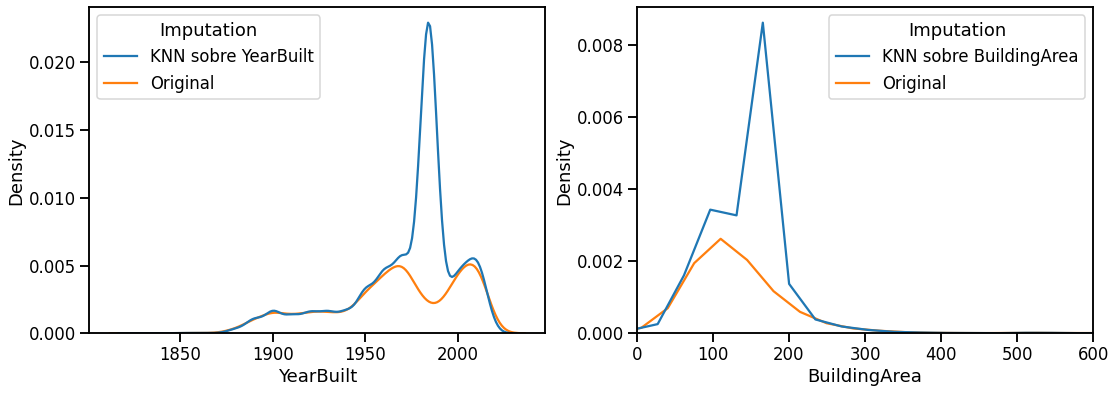

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize =(18, 6)) 
seaborn.kdeplot(data=data_yb, x='YearBuilt', hue='Imputation', ax = ax1)
seaborn.kdeplot(data=data_ba, x='BuildingArea', hue='Imputation', ax = ax2) 
ax2.set_xlim([0, 600])
plt.show()

##Al observar los graficos notamos que despues de imputar los valores faltantes la curva presenta picos que se alejan mucho de la original, es por ello que decidimos scalar los datos previamente.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


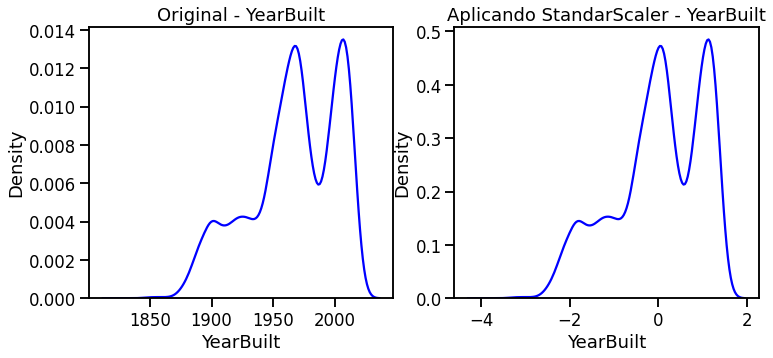

In [ ]:
melb_data_scaler = melb_df_encoded.copy(deep=True)
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(melb_data_scaler)
scaled_df = pd.DataFrame(scaled_df, columns=vec.get_feature_names())

fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize =(12, 5)) 
ax1.set_title('Original - YearBuilt') 
  
seaborn.kdeplot(melb_data_scaler['YearBuilt'], ax = ax1, color ='b') 
ax2.set_title('Aplicando StandardScaler - YearBuilt')  
seaborn.kdeplot(scaled_df['YearBuilt'], ax = ax2, color ='b') 

plt.show()

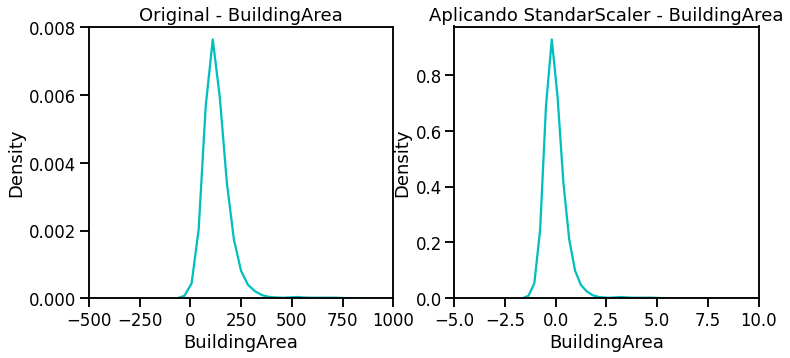

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize =(12, 5)) 
ax1.set_title('Original - BuildingArea')
ax1.set_xlim([-500, 1000])
seaborn.kdeplot(melb_data_scaler['BuildingArea'], ax = ax1, color ='c') 
ax2.set_title('Aplicando StandardScaler - BuildingArea')
ax2.set_xlim([-5, 10])  
seaborn.kdeplot(scaled_df['BuildingArea'], ax = ax2, color ='c') 

plt.show()

##Aplicamos la imputacion de datos KNN sobre los datos escalados.

In [ ]:
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(),n_nearest_features=5)
values = scaled_df.values.copy()

imputed_scaled = imputer.fit_transform(values)

inv_imputer = pd.DataFrame(scaler.inverse_transform(imputed_scaled), columns=vec.get_feature_names())
inv_imputer['Imputation'] = 'KNN sobre StandardScaler'

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##Filtramos los conjuntos de datos de las columnas de interes.

In [ ]:
filtr_yb = inv_imputer.loc[:,['YearBuilt','Imputation']]
filtr_ba = inv_imputer.loc[:,['BuildingArea', 'Imputation']]

melb_yb_final = pd.concat([data_yb,filtr_yb])
melb_yb_final = melb_yb_final.reset_index()
melb_yb_final.drop(['index'], axis=1, inplace=True)

melb_ba_final = pd.concat([data_ba,filtr_ba])
melb_ba_final = melb_ba_final.reset_index()
melb_ba_final.drop(['index'], axis=1, inplace=True)

##Realizamos los gráficos para comparar los resultados.

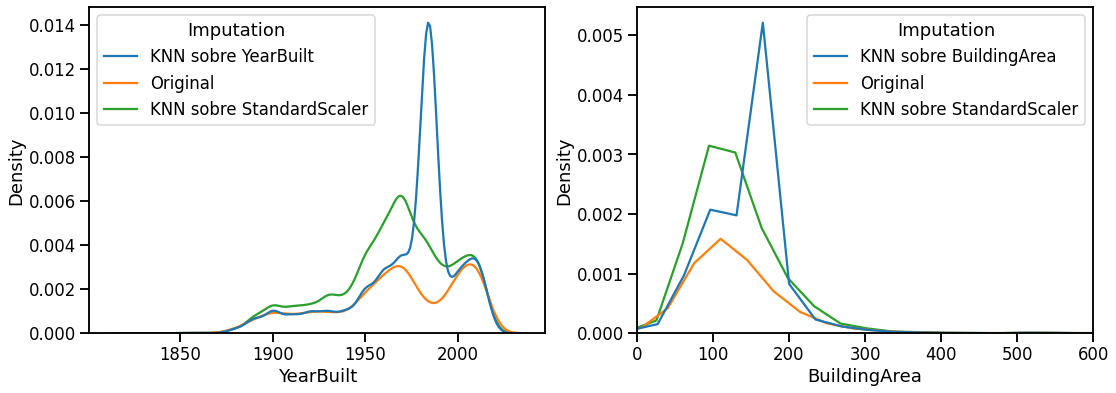

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize =(18, 6)) 
seaborn.kdeplot(data=melb_yb_final, x='YearBuilt', hue='Imputation', ax = ax1)
seaborn.kdeplot(data=melb_ba_final, x='BuildingArea', hue='Imputation', ax = ax2) 
ax2.set_xlim([0, 600])
plt.show()

##Replicamos el procedimiento pero esta vez utilizamos el scalador "MinMaxScaler"

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_mm_df = scaler.fit_transform(melb_data_scaler)
scaled_mm_df = pd.DataFrame(scaled_mm_df, columns=vec.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(),n_nearest_features=5)
values_mm = scaled_mm_df.values.copy()

imputed_scaled_mm = imputer.fit_transform(values_mm)

inv_imputer_mm = pd.DataFrame(scaler.inverse_transform(imputed_scaled_mm), columns=vec.get_feature_names())
inv_imputer_mm['Imputation'] = 'KNN sobre MinMaxScaler'

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
filtr_yb_mm = inv_imputer_mm.loc[:,['YearBuilt','Imputation']]
filtr_ba_mm = inv_imputer_mm.loc[:,['BuildingArea', 'Imputation']]

melb_yb_mm_final = pd.concat([data_yb,filtr_yb_mm])
melb_yb_mm_final = melb_yb_mm_final.reset_index()
melb_yb_mm_final.drop(['index'], axis=1, inplace=True)

melb_ba_mm_final = pd.concat([data_ba,filtr_ba_mm])
melb_ba_mm_final = melb_ba_mm_final.reset_index()
melb_ba_mm_final.drop(['index'], axis=1, inplace=True)

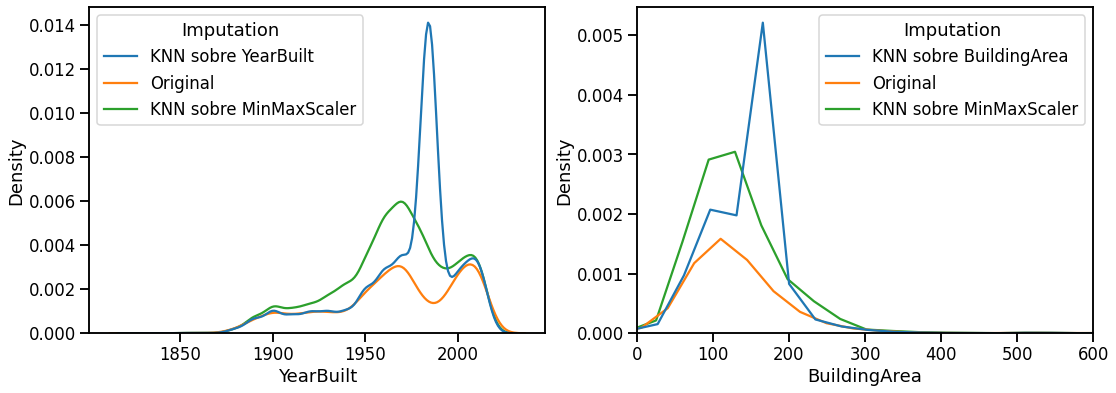

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize =(18, 6)) 
seaborn.kdeplot(data=melb_yb_mm_final, x='YearBuilt', hue='Imputation', ax = ax1)
seaborn.kdeplot(data=melb_ba_mm_final, x='BuildingArea', hue='Imputation', ax = ax2) 
ax2.set_xlim([0, 600])
plt.show()

##Al observar el grafico final concluimos que es necesario escalar el conjunto de datos antes de estimar valores faltantes. Tambien podemos concluir que no existen diferencias significativas al escalar utilizando los metodos StandardScaler y MinMaxScaler.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

##1. Para aplicar PCA solo debemos tener en cuenta las variables numéricas continuas, es por ello que debemos filtrar nuestros conjunto de datos. También es necesario escalar nuestro conjunto de datos para evitar que unas variables tengan mayor peso que otras.

In [ ]:
# Eliminamos variables categoricas
melb_df_filter=melb_df[melb_df.columns.difference(['Date','Suburb','Type', 'Postcode','CouncilArea', 'zipcode'])]
melb_dict2 = list(melb_df_filter.T.to_dict().values())
vec2 = DictVectorizer(sparse=False) 
melb_matrix2 = vec2.fit_transform(melb_dict2)

# Encoding
melb_df_encoded2 = pd.DataFrame(melb_matrix2, columns=vec2.get_feature_names())
melb_df_encoded2.head(1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,BuildingArea,Car,Landsize,Lattitude,Longtitude,Price,Rooms,YearBuilt,airbnb_price_max,airbnb_price_mean,airbnb_record_count
0,NaN,1.0,202.0,-37.7996,144.9984,1480000.0,2.0,NaN,336.0,111.295547,247.0


In [ ]:
# Escalamos
scaler = preprocessing.RobustScaler()
scaled_df2 = scaler.fit_transform(melb_df_encoded2)
scaled_df2 = pd.DataFrame(scaled_df2, columns=vec2.get_feature_names())

imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(),n_nearest_features=5)
values = scaled_df2.values.copy()

imputed_scaled2 = imputer.fit_transform(values)
imputed_scaled_df2 = pd.DataFrame(imputed_scaled2, columns=vec2.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##3.2 Aplicamos PCA y obtenemos la varianza capturada por los primeros $n$ componentes principales, para cada $n$

###Decidimos estandarizar antes de aplicar PCA para evitar que alguna de las varaibles sea predominante.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


n = min(20, imputed_scaled_df2.shape[1])

pipeline = make_pipeline(preprocessing.StandardScaler(),PCA(n_components=n)) # Aplicamos estandarizado
pipeline.fit(imputed_scaled_df2)


modelo = pipeline.named_steps['pca']

### Construimos el data frame de la transformación por componentes principales PCA

In [ ]:
pca = pd.DataFrame(
    data    = modelo.components_,
    columns = vec2.get_feature_names(),
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11']
)
pca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,BuildingArea,Car,Landsize,Lattitude,Longtitude,Price,Rooms,YearBuilt,airbnb_price_max,airbnb_price_mean,airbnb_record_count
PC1,0.197365,0.313543,0.050625,0.293588,-0.029961,-0.034734,0.337847,0.182473,-0.498532,-0.487595,-0.371695
PC2,0.360094,0.255650,0.053707,-0.301021,0.277871,0.578034,0.421179,-0.222107,0.152003,0.202716,-0.096017
PC3,-0.071726,0.310450,0.134361,-0.438621,0.459051,-0.253923,-0.128328,0.624655,0.011905,0.069452,-0.034690
PC4,0.249194,0.311433,0.411930,0.216135,-0.532565,-0.048678,0.145710,0.322868,0.255589,0.244884,0.296221
PC5,-0.156656,-0.181056,0.889063,0.031904,0.225762,0.048187,-0.095059,-0.247493,-0.112739,-0.121878,-0.009132
PC6,0.683798,-0.376054,-0.037884,0.091759,0.298831,-0.104989,-0.056546,0.107689,-0.153955,-0.128351,0.475242
PC7,0.426272,-0.355915,0.111606,-0.178342,-0.217823,-0.182539,-0.156841,0.067897,0.127484,0.191290,-0.696085
PC8,0.124447,0.305293,-0.049034,0.643386,0.406694,0.008123,-0.380689,-0.083661,0.300177,0.158367,-0.205874
PC9,0.271713,0.481136,0.004512,-0.349544,-0.219980,-0.112711,-0.515409,-0.411976,-0.135614,-0.218120,0.100225
PC10,-0.025974,-0.005534,-0.007461,0.079240,-0.077030,0.350736,-0.290183,0.148416,-0.673530,0.551455,0.005606


##Luego de entrenar el modelo, reducimos la dimensionalidad de las nuevas observaciones.

In [ ]:
proyecciones = pipeline.transform(X=imputed_scaled_df2)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11'],
    index   = imputed_scaled_df2.index
)
print('Shape')
print(proyecciones.shape)
print('Muestra')
proyecciones.head()

Shape
(11708, 11)
Muestra


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.540370,0.517192,-1.292155,-0.615745,0.358159,-0.109445,-0.131798,0.620328,0.426278,0.222398,0.630413
1,-2.131544,-0.421643,-1.743978,-1.258501,0.699559,0.216735,0.401183,0.104496,0.046991,-0.205678,-0.037692
2,-1.614599,0.935044,-2.196977,-0.971044,0.511318,0.502927,0.308008,-0.289253,-0.526994,-0.240013,0.123550
3,-0.635051,-0.508869,0.554571,0.401898,-0.503732,0.056123,-0.020062,-0.108215,-1.232698,-0.252460,0.234452
4,0.302467,1.541959,0.603908,1.177966,-0.959368,-0.318955,-0.735291,-0.203250,-1.345886,0.013750,0.832977


## Analizamos a la primera componente PC1, y observamos que los pesos asignados a las variables: BuildingArea, Car y Rooms son muy similares y superiores al asignado al resto.

##3.3 Porcentaje de varianza por componente

In [ ]:
print(modelo.explained_variance_ratio_)

[0.22508023 0.19268795 0.11565023 0.09572767 0.08909963 0.07011453
 0.06447983 0.04618111 0.04313712 0.0312382  0.0266035 ]


##Luego calculamos la varianza de cada componente respecto de la total y comparamos.


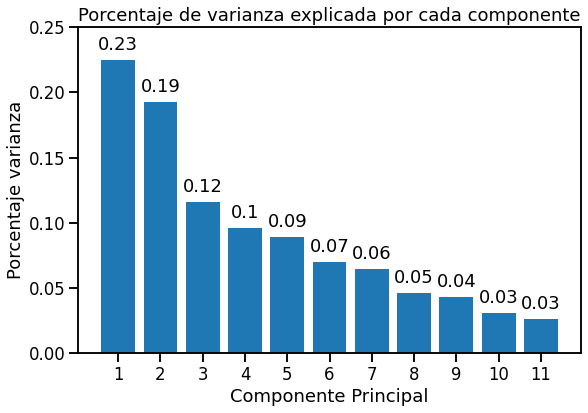

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
ax.bar(
    x      = numpy.arange(modelo.n_components_) + 1,
    height = modelo.explained_variance_ratio_
)

for x, y in zip(numpy.arange(len(scaled_df2.columns)) + 1, modelo.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(numpy.arange(modelo.n_components_) + 1)
ax.set_ylim(0, .25)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente Principal')
ax.set_ylabel('Porcentaje varianza');

## Podemos observar que la primera componente explica el 23% de la varianza observada, la segunda el 19% y la tercera el 12%.


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

melb_df = pd.read_csv(
    'https://github.com/chino1504/diplodatos/blob/main/EyCD/melb_df_final.csv?raw=true')
categorical_cols = ['Type', 'Suburb']
numerical_cols = melb_df.select_dtypes(include=['float64','int64']).columns
new_columns = []


### Aplicamos el encoding a las columnas categoricas







In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))


Matrix has shape (11708, 312), with columns: ['Type=h', 'Type=t', 'Type=u', 'Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Attwood', 'Suburb=Avondale Heights', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=B

### Aplicamos el encoding a las columnas numericas

In [ ]:
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

Matrix has shape (11708, 312), with columns: ['Type=h', 'Type=t', 'Type=u', 'Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Attwood', 'Suburb=Avondale Heights', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=B

### Agregamos las 3 primeras columnas del PCA

In [ ]:
X_pca = numpy.hstack([X, proyecciones.PC1.values.reshape(X.shape[0],1),\
                   proyecciones.PC2.values.reshape(X.shape[0],1),\
                   proyecciones.PC3.values.reshape(X.shape[0],1)])
new_columns.extend(['pca1', 'pca2', 'pca3'])

### Por ultimo reconstruimos el Dataframe

In [ ]:
processed_melb_df = pd.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

,Type=h,Type=t,Type=u,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,...,YearBuilt,Lattitude,Longtitude,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_price_max,pca1,pca2,pca3
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-37.7996,144.9984,3067.0,247.0,111.295547,336.0,-1.540370,0.517192,-1.292155
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1900.0,-37.8079,144.9934,3067.0,247.0,111.295547,336.0,-2.131544,-0.421643,-1.743978
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1900.0,-37.8093,144.9944,3067.0,247.0,111.295547,336.0,-1.614599,0.935044,-2.196977
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-37.7969,144.9969,3067.0,247.0,111.295547,336.0,-0.635051,-0.508869,0.554571
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2014.0,-37.8072,144.9941,3067.0,247.0,111.295547,336.0,0.302467,1.541959,0.603908


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:
